### Least squares regression workbook

There are four sets of problems in this workbook. Some problems are covered in class, others are assigned as homework. Please complete all problems.

1. [Geometric mean regression](#1.-Geometric-mean-regression)
2. [Multivariate regression tutorial: aragonite saturation state](#2.-Multivariate-regression-tutorial:-aragonite-saturation-state)
3. [Application of final model for aragonite saturation state](#3.-Application-of-final-model-for-aragonite-saturation-state)
4. [Python modules](#4.-Python-modules)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

import PyCO2SYS as pyco2

Load 2007 data

In [2]:
filename07 = 'data/wcoa_cruise_2007/32WC20070511.exc.csv'
df07 = pd.read_csv(filename07,header=29,na_values=-999,parse_dates=[[6,7]])

In [3]:
df07.keys()

Index(['DATE_TIME', 'EXPOCODE', 'SECT_ID', 'SAMPNO', 'LINE', 'STNNBR',
       'CASTNO', 'LATITUDE', 'LONGITUDE', 'BOT_DEPTH', 'BTLNBR',
       'BTLNBR_FLAG_W', 'CTDPRS', 'CTDTMP', 'CTDSAL', 'CTDSAL_FLAG_W',
       'SALNTY', 'SALNTY_FLAG_W', 'CTDOXY', 'CTDOXY_FLAG_W', 'OXYGEN',
       'OXYGEN_FLAG_W', 'SILCAT', 'SILCAT_FLAG_W', 'NITRAT', 'NITRAT_FLAG_W',
       'NITRIT', 'NITRIT_FLAG_W', 'PHSPHT', 'PHSPHT_FLAG_W', 'TCARBN',
       'TCARBN_FLAG_W', 'ALKALI', 'ALKALI_FLAG_W'],
      dtype='object')

Load 2013 data

In [4]:
filename13 = 'data/wcoa_cruise/WCOA2013_hy1.csv'
df13 =  pd.read_csv(filename13,header=31,na_values=-999,parse_dates=[[8,9]])

Use the PyCO2SYS package to calculate seawater carbon chemistry parameters.

https://pyco2sys.readthedocs.io/en/latest/

In [22]:
c07 = pyco2.sys(df07['ALKALI'], df07['TCARBN'], 1, 2,
               salinity=df07['CTDSAL'], temperature=df07['CTDTMP'], 
                pressure=df07['CTDPRS'])

In [23]:
c13 = pyco2.sys(df13['ALKALI'], df13['TCARBN'], 1, 2,
               salinity=df13['CTDSAL'], temperature=df13['CTDTMP'], 
                pressure=df13['CTDPRS'])

### 1. Geometric mean regression

3.27 and 3.28 on page 62 of Glover, Jenkins and Doney.

In [7]:
# select subset of good data
ii = ((df07['CTDPRS'] >= 30) & (df07['CTDPRS'] <= 300) & 
      (df07['NITRAT_FLAG_W'] == 2) & (df07['PHSPHT_FLAG_W'] == 2)
      & (df07['CTDOXY_FLAG_W'] == 2) & (df07['CTDSAL_FLAG_W'] == 2)
      & (df07['TCARBN_FLAG_W'] == 2) & (df07['ALKALI_FLAG_W'] == 2))

# least-squares regression of oxygen on nitrate
result_NO = stats.linregress(df07['NITRAT'][ii], df07['CTDOXY'][ii])
print('slope_NO = ',result_NO.slope)
# least-squares regression of nitrate on oxygen
result_ON = stats.linregress(df07['CTDOXY'][ii],df07['NITRAT'][ii])
print('slope_ON = ',result_ON.slope)

slope_NO =  -6.875058898572211
slope_ON =  -0.11142855406251735


Text(0.5, 0, 'Nitrate [$\\mu$mol/kg]')

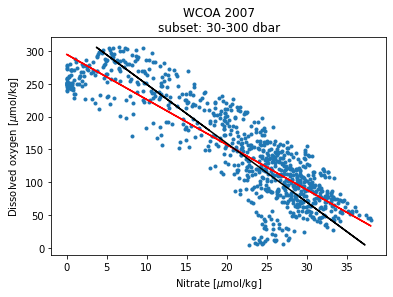

In [8]:
plt.figure()
plt.plot(df07['NITRAT'][ii],df07['CTDOXY'][ii],'.')
plt.plot(df07['NITRAT'][ii],
         df07['NITRAT'][ii]*result_NO.slope + result_NO.intercept,'r-')
plt.plot(df07['CTDOXY'][ii]*result_ON.slope + result_ON.intercept,
         df07['CTDOXY'][ii],'k-')
plt.title('WCOA 2007\nsubset: 30-300 dbar')
plt.ylabel('Dissolved oxygen [$\mu$mol/kg]')
plt.xlabel('Nitrate [$\mu$mol/kg]')

a. (*In class*) Calculate the Type II geometric mean regression slope.

In [9]:
# insert code here

b. (*In class*) Calculate the intercept for the Type II geometric mean regression line. 

In [10]:
# insert code here

c. (*Homework*) Create a function that calculates the geometric mean regression slope and intercept for any two variables. Include a descriptive doc-string that describes what the function does.

In [11]:
def gmregress(x,y):
    '''
    Insert doc-string here
    '''
    # insert code here
    return slope,intercept

d. (*Homework*) Test your function by applying it to the same oxygen and nitrate data used above.

In [12]:
# insert code here

### 2. Multivariate regression tutorial: aragonite saturation state

Using data from the West Coast Ocean Acidification (WCOA) cruise, create two different multiple linear regression models to calculate aragonite saturation state (OmegaA) between 30 and 300 dbar as a function of more commonly observed variables.

#### Model 1: Temperature, salinity, pressure, dissolved oxygen and nitrate:

* Temperature
* Salinity
* Pressure
* Oxygen
* Nitrate

$\hat{\Omega}_A = c_0 + c_1\times T + c_2\times S + c_3\times p + c_4\times O_2 + c_5\times N$ 

a. (*in class*) Create a 1-D array for the response variable, `y`. Which variable is the response variable in this case?

In [13]:
# insert code here

b. (*in class*) Create a 2-D array `X` that contains a column of all ones, and additional columns containing the explanatory variables. This 2-D array is called the "design matrix" and should have six columns. What are the explanatory variables in this case? 

* Approach: use `np.ones()` to create a 2-D array of correct size, then fill in the columns.

In [14]:
# insert code here

c. (*in class*) Use `np.linalg.lstsq` to compute the set of coefficients, `c`.

In [15]:
# insert code here

d. (*in class*) Use `np.dot` to compute the modeled values `yhat`

In [16]:
# insert code here

e. (*in class*) Plot model vs. observations.

In [17]:
# insert code here

f. (*in class*) Plot residuals vs. observations.

In [18]:
# insert code here

g. (*in class*) Use `statsmodels` to get a complete summary of regression statistics.

In [19]:
# insert code here

h. (*in class*) Alternate approach using `statsmodels` formulas.

In [20]:
# insert code here

### 3. Application of final model for aragonite saturation state

In this section, data from the 2007 WCOA cruise are used to model aragonite saturation state following the model proposed by Juranek et al. (2009). An important question is whether this model can predict aragonite saturation state in different years. This model is can be tested using an independent data set from the 2013 WCOA cruise.

#### Final model: Dissolved oxygen, and the interaction between oxygen and temperature (subtracting constant reference values):

$\hat{\Omega}_A = a_0 + a_1 \times (O - Oref) + a_2 \times (O - Oref) \times (T - Tref)$

a. (Homework) Calculate the coefficients $a_0$, $a_1$ and $a_2$ using either the design matrix approach or `statsmodels` formulas.

In [17]:
# insert code here

b. (Homework) Calculate the root mean squared error for this  model.

In [18]:
# insert code here

c. (Homework) Plot the residuals vs. the observations.

In [19]:
# insert code here

d. (Homework) Use the coefficients calculated in part a to compute predicted aragonite saturation state for the 2013 cruise. Use the subset of 2013 data between 30 dbar and 300 dbar (created below).

In [20]:
# load data and take subset
filename13 = 'wcoa_cruise_2013/WCOA2013_hy1.csv'
df13 =  pd.read_csv(filename13,header=31,na_values=-999,parse_dates=[[8,9]])

Csw13 = cb.Csys(DIC=df13['TCARBN'],
             TA=df13['ALKALI'],
             T_in=df13['CTDTMP'],
             S_in=df13['CTDSAL'],
             P_in=df13['CTDPRS'])

df13['OmegaA'] = (Ca*Csw13['CO3'])/(Csw13.Ks['KspA']*1e6)

# select subset of good data
jj = ((df13['CTDPRS'] >= 30) & (df13['CTDPRS'] <= 300) & 
      (df13['NITRAT_FLAG_W'] == 2) & (df13['PHSPHT_FLAG_W'] == 2)
      & (df13['CTDOXY_FLAG_W'] == 2) & (df13['CTDSAL_FLAG_W'] == 2)
      & (df13['TCARBN_FLAG_W'] == 2) & (df13['ALKALI_FLAG_W'] == 2))

dfsub13 = df13[jj]

In [21]:
# insert code here

e. (Homework) Calculate the root mean squared error (RMSE) between the model prediction and aragonite saturation state observations during 2013. Describe how this RMSE value compares with the RMSE calculated for the 2007 observations.

In [22]:
# insert code here

*insert text here*

f. (Homework)  Make a plot of the residuals vs. observations during 2013. Comment on whether there are any biases in the model.

In [23]:
# insert code here

*insert text here*

g. (Homework) In a paragraph, compare the two different regressions (model 1 and the final model), commenting on:
  * General applicability of the model equations
  * Statistical significance
  * Multiple co-linearity
  * The potential for numerical errors
  * How well the model represents aragonite saturation state in different years
  * Your scientific interpretation

*insert text here*